In [2]:
#!pip install nltk

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#nltk.download('averaged_perceptron_tagger')
#nltk.download('words')
#nltk.download('maxent_ne_chunker')
#plt.style.use('ggplot')
import nltk
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Cleaned_comments_witth Label.csv')

df.drop_duplicates().dropna()

,video_id,label,clean_comment,Label
0,jt2OHQh0HoQ,False,it s more accurate to call it the m 1000 becau...,0
1,jt2OHQh0HoQ,False,to be there with a samsung phone n,0
2,jt2OHQh0HoQ,False,thank gosh a place i can watch it without havi...,0
3,jt2OHQh0HoQ,False,what happened to the home button on the iphone...,0
4,jt2OHQh0HoQ,False,power is the disease care is the cure keep car...,0
...,...,...,...,...
358019,lLN1FwiqGwc,False,gasp n gasp n gasp,0
358020,lLN1FwiqGwc,False,yeah but does everybody float,0
358021,lLN1FwiqGwc,False,that meme me d ace,0
358022,lLN1FwiqGwc,False,10 43 is that miles ups hur,0


In [7]:
df.groupby('video_id')['clean_comment'].count().sort_values(ascending=False) # finding the top 1 video id has the most comments

video_id
LunHybOKIjU    1130
Q0CbN8sfihY    1101
r9-DM9uBtVI     950
t3AVtQkEHaE     941
uE6iQ5HiJts     919
               ... 
AnCYGSMxWzk       2
aVatBKfRUZ8       2
un75cup_EKs       2
srr_7fM-hL4       1
YMDGPSWWA18       1
Name: clean_comment, Length: 1692, dtype: int64

In [5]:
#df.sort_values(by = 'likes',ascending =False).head(10)
df_like_replies= pd.read_csv('Centimental_Analysis_YouTubeGB_results.csv')

# df_like_replies = df_like_dislikes[['likes', 'replies', 'Analysis_comments']]
# df_like_replies#.reset_index(inplace=True)
# df_like_replies= df_like_dislikes.rename(columns = {'index':'video_id'})
df_like_replies.drop_duplicates().dropna()

,video_id,comment_text,likes,replies,negative_comments,neutral_comments,positive_comments,compound_comments,Analysis_comments
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.310,0.690,0.000,-0.5574,Negative
1,jt2OHQh0HoQ,To be there with a samsung phone\n______,1,0,0.310,0.690,0.000,-0.5574,Negative
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.310,0.690,0.000,-0.5574,Negative
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.310,0.690,0.000,-0.5574,Negative
4,jt2OHQh0HoQ,Power is the disease._ Care is the cure._ Keep...,0,0,0.310,0.690,0.000,-0.5574,Negative
...,...,...,...,...,...,...,...,...,...
718448,XQFeShp6UIY,Exploit used = Not World__ First. Simple.,2,2,0.171,0.667,0.162,-0.0516,Negative
718449,XQFeShp6UIY,Some exotics in Destiny have hidden perks. The...,3,4,0.171,0.667,0.162,-0.0516,Negative
718450,XQFeShp6UIY,Why is there a race if it's literally the same...,1,3,0.171,0.667,0.162,-0.0516,Negative
718451,XQFeShp6UIY,Who the fuck cares about some stupid heavy gli...,0,2,0.171,0.667,0.162,-0.0516,Negative


In [6]:
df_like_replies.groupby('video_id')['comment_text'].count().sort_values(ascending=False) # finding the top 1 video id has the most comments

video_id
#NAME?         10318
LunHybOKIjU     1200
Q0CbN8sfihY     1199
t3AVtQkEHaE     1100
r9-DM9uBtVI     1050
               ...  
9lx41ak9GWk        4
35zynOrkvMk        3
srr_7fM-hL4        2
utPFb_tNARo        2
jNb0vRORLAw        2
Name: comment_text, Length: 1669, dtype: int64

In [23]:
df_like_replies.loc['video_id'] = "LunHybOKIjU"
df_like_replies=df_like_replies[['video_id','comment_text','likes','replies','Analysis_comments']]
df_like_replies.drop_duplicates(inplace=True)
df_like_replies.dropna(inplace=True)

In [5]:
#df=df.merge(df_like_dislikes,on='video_id')

In [25]:
df_like_replies.shape

(407737, 5)

# Comments annalysis on Top1 videoId 

# Sentiment Analysis
## Step 1. VADER Setiment Scoring, we will use SentimentIntensityAnalyzer

    this uses a "bag of words"approach
    1.stop words are removed 
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

In [27]:
str(df_like_replies['comment_text']).encode('utf-8')

b"0           It's more accurate to call it the M+ (1000) be...\n1                    To be there with a samsung phone\\n______\n2           Thank gosh, a place I can watch it without hav...\n3           What happened to the home button on the iPhone...\n4           Power is the disease._ Care is the cure._ Keep...\n                                  ...                        \n718449      Some exotics in Destiny have hidden perks. The...\n718450      Why is there a race if it's literally the same...\n718451      Who the fuck cares about some stupid heavy gli...\n718452      So using mechanics built into the raid is chea...\nvideo_id                                          LunHybOKIjU\nName: comment_text, Length: 407737, dtype: object"

# run the polarity score to the entire df 

In [29]:
#topid_name=df.query('video_id == "#NAME?"')
topid=df_like_replies.query('video_id== "LunHybOKIjU"')[['comment_text','likes','replies','Analysis_comments']] # finding the top 1 video id has the most comments
topid # now we have topid thathas most commnets and we can anaysis how his/her audiance feel about his videos.

,comment_text,likes,replies,Analysis_comments
543732,I see a lot of comrades in this section. How i...,0,0,Positive
543733,Take some more medication and hang out with ch...,0,0,Positive
543734,Eminem the Caucasian Tupac. Always speaking ab...,0,0,Positive
543735,Dayyyum i thought __ry me a river_ was the whi...,0,0,Positive
543736,Trump will send a nasty tweet and ban rap,1,0,Positive
...,...,...,...,...
544928,faginem,0,0,Positive
544929,GARBAGE! #MAGA2020_____わ_,0,0,Positive
544930,Eminem you're old dude you're simply just not ...,0,1,Positive
544931,https://youtu.be/hdWT4CipytE\nWrestling fan snaps,1,1,Positive


In [ ]:
#!pip install textblob

In [30]:
import os
import nltk
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [32]:
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('\!','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('\-','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('\|','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('https?:\/\/\S+','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('\\','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('_____','',regex=True)
topid.loc[:,'comment_text'] = topid.loc[:,'comment_text'].str.replace('__','',regex=True)

# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\!','',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\-','',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\|','',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('#','',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\+',' ',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\(',' ',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\)',' ',regex=True)
# df.loc[:,'title'] = df.loc[:,'title'].str.replace('\:',' ',regex=True)
# df.loc[:,'tags'] = df.loc[:,'tags'].str.replace('\|',' ',regex=True)
# df.loc[:,'tags'] = df.loc[:,'tags'].str.replace('\"',' ',regex=True)
# df.loc[:,'category_names'] = df.loc[:,'category_names'].str.replace('\&','',regex=True)
# df.loc[:,'category_names'] = df.loc[:,'category_names'].str.replace('\-','',regex=True)
# df.loc[:,'category_names'] = df.loc[:,'category_names'].str.replace('\/','',regex=True)
# df.head()

In [43]:
topid.head(100)
topid.to_csv("topid.csv",index=False,encoding='utf-8')

In [35]:
text = topid['comment_text'].sum()

In [41]:
text

"I see a lot of comrades in this section. How is going comrades? How is price of potato?Take some more medication and hang out with child molesters in Hollywood Marshall Liberalism is a mental disease that meds can't fix.Eminem the Caucasian Tupac. Always speaking about what every other rapper too scared to mention in our corrupted society. Reason why they're the two greatest rappers ever in my eyes.Dayyyum i thought ry me a river_ was the white mans it em up_ but this shit hardTrump will send a nasty tweet and ban rapFreedom of speech is a mf lolI love Eminem so much more now. Can't wait for trump to tweet tomorrow at 3am how Eminem and BET has the lowest ratings ever in history lolGo back to doing drugs and talking about killing yourself & family. Also if people get to openly judge Donald Trump for his skin color/tone then it's acceptable to do the same of Blacks, Yellows, Browns, Reds... ect.Damn trump better not try to diss Eminem or it overI'm not a trump fan but this shit stupid.

In [36]:
wordcloud = WordCloud().generate(text)

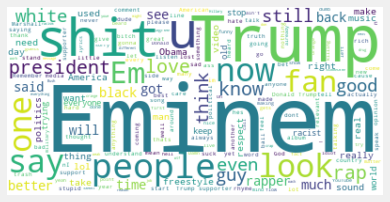

In [38]:
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
#topid.to_csv('TopID_Comments_Analysis_YouTubeGB.csv',index=False,encoding='utf-8')

In [40]:
#text